In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

import warnings
warnings.filterwarnings("ignore")


In [25]:
# LOAD THE DATASET
df  = pd.read_csv(r'C:\Users\anmol\Downloads\\final_dataset.csv', encoding='ISO-8859-1')

#DIPLAY FIRST FIVE ROWS OF THE DATASET
df.head()


,Unnamed: 0,beds,baths,size,zip_code,price
0,0,3,2.5,2590.0,98144,795000.0
1,1,4,2.0,2240.0,98106,915000.0
2,2,4,3.0,2040.0,98107,950000.0
3,3,4,3.0,3800.0,98199,1950000.0
4,4,2,2.0,1042.0,98102,950000.0


In [29]:
#EXPLORATION OF THE DATA 
df.info()

#SUMMARY STATISTICS OF THE DATA
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2016 non-null   int64  
 1   beds        2016 non-null   int64  
 2   baths       2016 non-null   float64
 3   size        2016 non-null   float64
 4   zip_code    2016 non-null   int64  
 5   price       2016 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 94.6 KB


,Unnamed: 0,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,1007.500000,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,582.113391,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,0.000000,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,503.750000,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,1007.500000,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,1511.250000,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,2015.000000,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


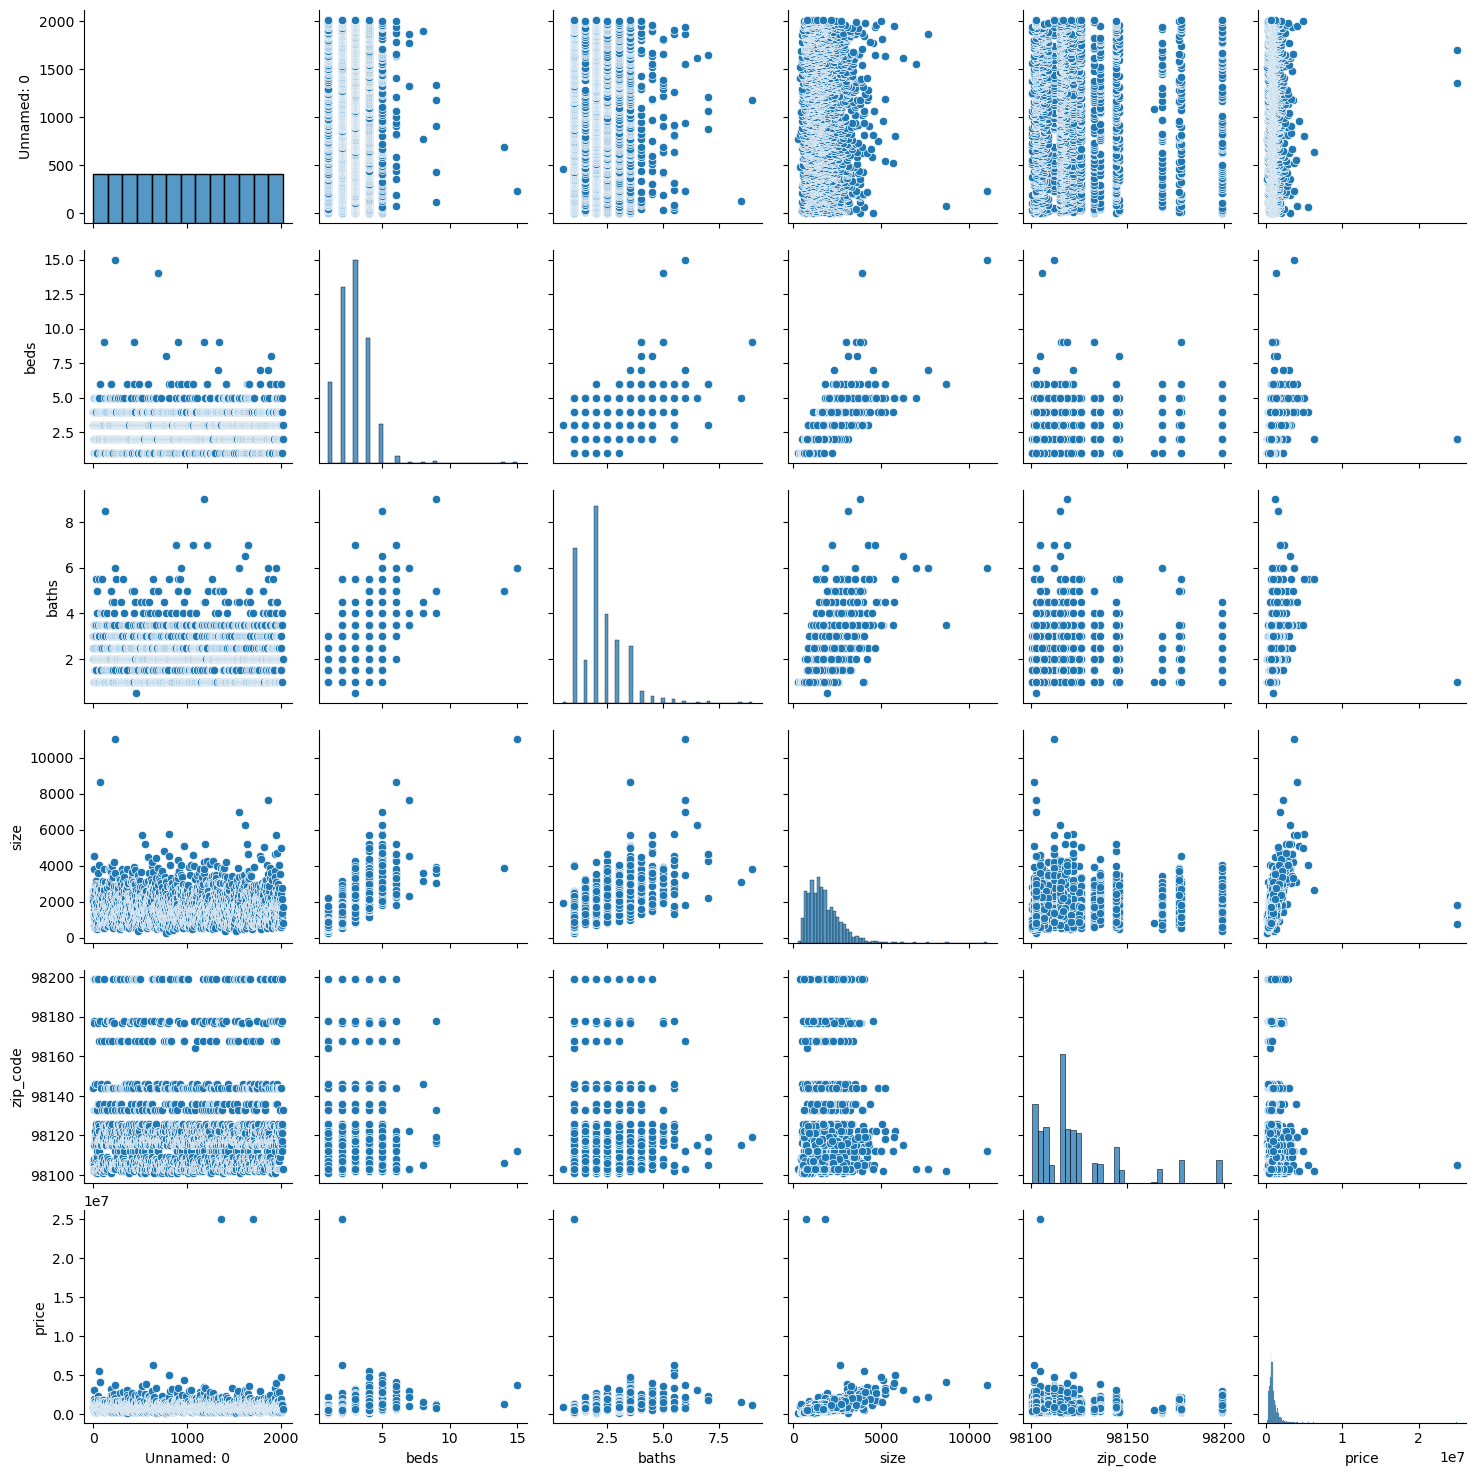

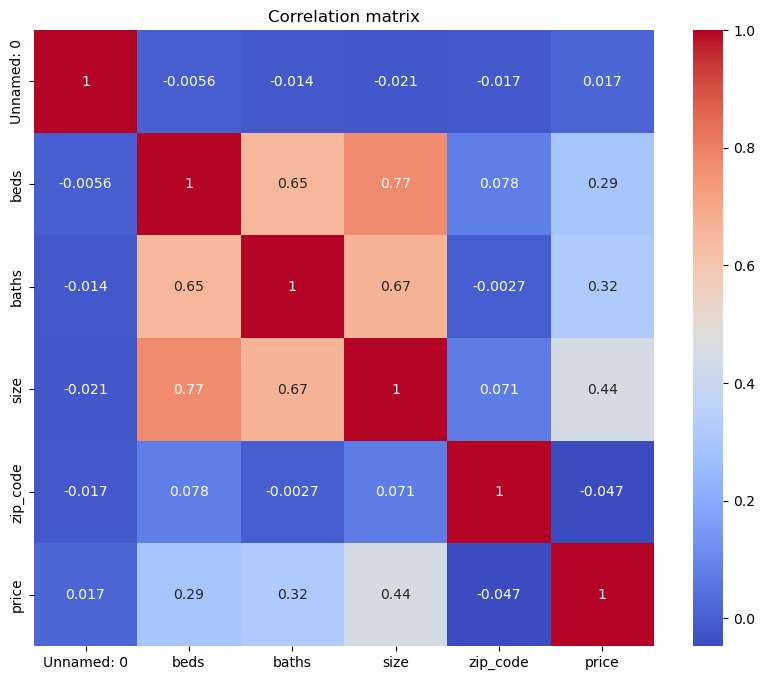

In [27]:
#PAIRPLOT IS USED TO VISUALIZE RELATIONSHIPS BETWEEN VARIABLES
sns.pairplot(df)
plt.show()

#CORRELATION MATRIX


correlation_matrix = df.corr() #.corr only allows to access numerical data
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix , annot = True , cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

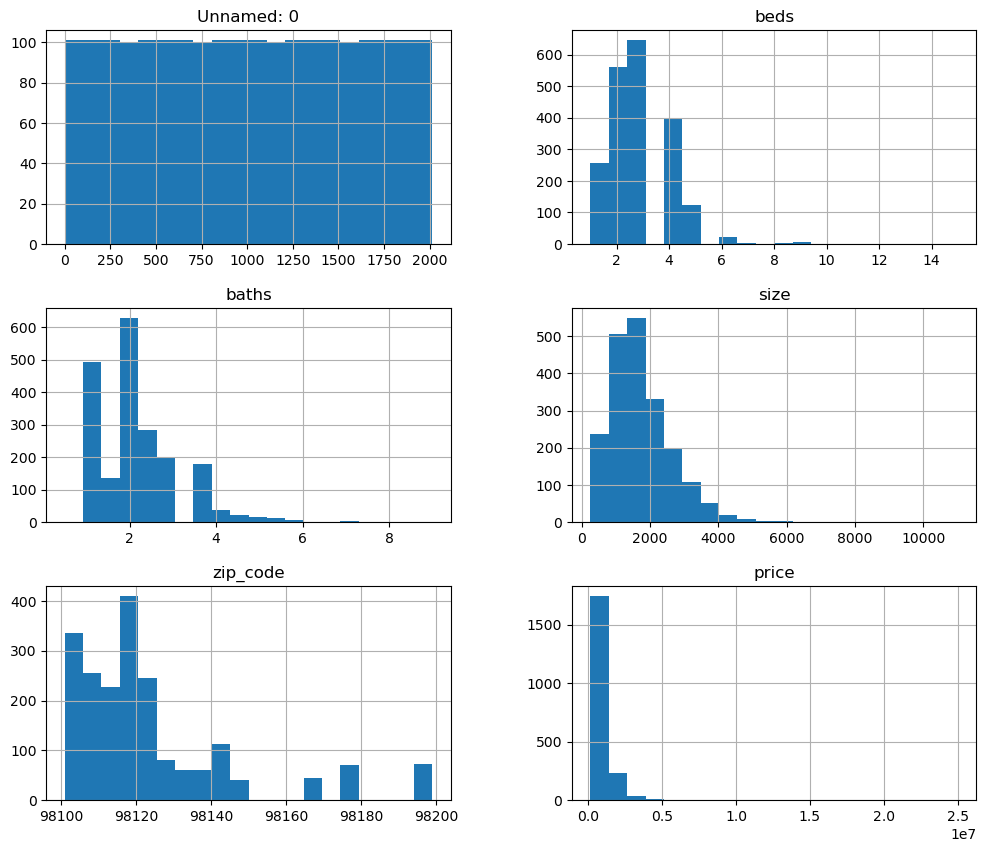

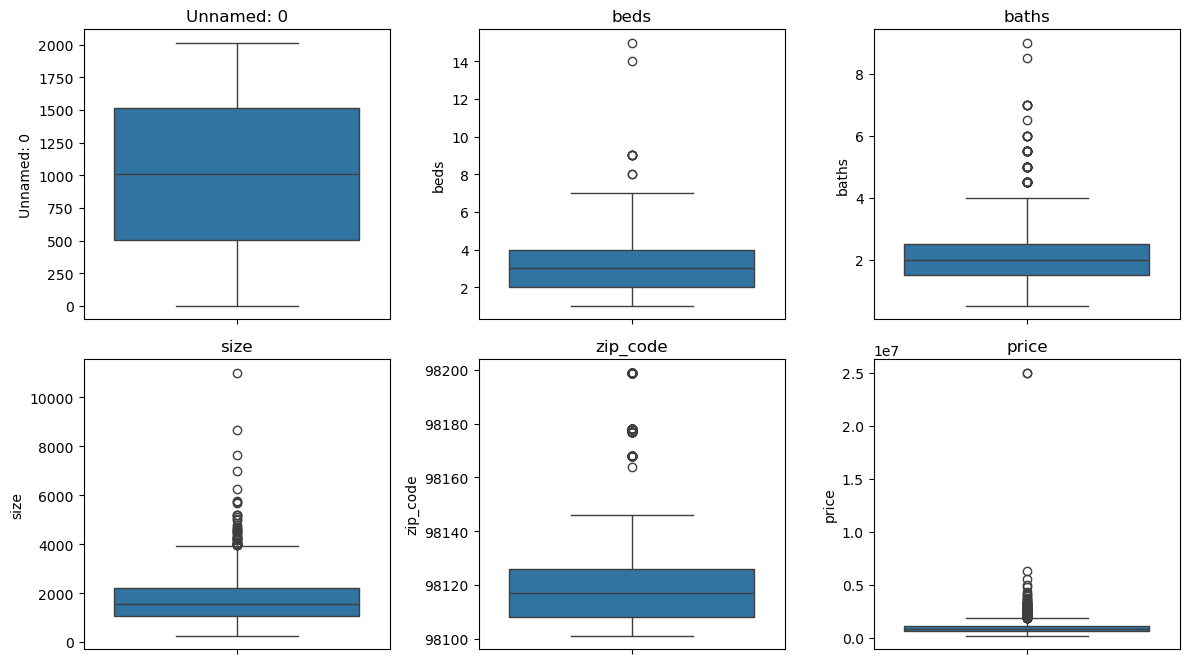

In [36]:
#HISTOGRAM FOR THE 
df.hist(figsize=(12,10),bins=20)
plt.show()

#BOX TO CHK FOR OUTLIERS
plt.figure(figsize=(12,10))
for i , column in enumerate (df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [44]:
# SIMPLE LINEAR REGRESSION
# DEFINE THE TARGET VARIABLE AND PREDICTOR VARIABLE
X = df[['size']] #should be in a table format bcz there might be one or more column of predictor
y = df['price'] #price will be in series because target is always one
#In Python, when working with pandas DataFrames,
#the reason for using double square brackets ([['size']]) when defining the predictor 
#variable X is to ensure that X remains a DataFrame, not a Series.


In [48]:
# SPLIT THE DATA INTO TRAINING AND TESTING SETS
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)
#test_size = 0.2 mens we are giving 80% data to machine only rest 20% for prediction
#the train part got 80% data and test part contain 20%

In [50]:
#CREATE AND TRAIN THE MODEL
# we are giving here training data to the machine to understand the pattern
simple_model = LinearRegression()
simple_model.fit(X_train , y_train)

LinearRegression()

Mean Squared Error: 154013700255.70197
R^2 Score: 0.5330001415076608


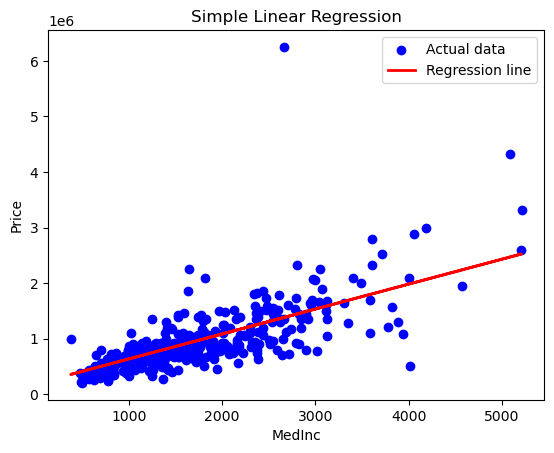

In [52]:
# Predictions
y_pred = simple_model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()
